# Week 4 Peer Review

## Description the Project
### Problem Overview
This project uses twitter data that has disasterous language. As English speakers, we are able to distinguish when a person is tweeting about a real disaster vs when a person is just using hyperboles. Computers, on the other hand, take the english language at face value and have trouble being able to properly classify if a tweet is refering to an actual disaster vs someone just being dramatic. The goal of this project is to train a recurrent neural network that can predict whether a tweet is actually about a disaster or not.
### Data Overview
The data for this project was collected by a company called figure 8 and collected it as a part of Data for Everyone initiative. It is twitter data that includes both a labelled training csv and am unlabelled testing csv. There are 7613 training tweets and 3263 testing tweets

## Exploratory Data Analysis
My goal with the exploratory data analysis procedure is to find the distribution of disaster and non-disaster tweets and to understand what the words in the tweets are. In the output of the below code block, you can see that this distribution is around 4000 non-disaster tweets and 3000 disaster tweets, so there is a pretty even distribution between the two classifiers.

I also want to look at how long the tweets are. Tweets have a character limit, so I know that there should not be any outliers in terms of text length. From the output of the code block below, we can see that the text lengths are between 5-15 words.

Finally, for my EDA, I want to look at what words are most common in the tweets. The top words are 'fatalities','armegeddon','deluge', and 'harm'.
### Data Cleaning Procedure
For cleaning and preprocessing the data, I'm going to do standard text preprocessing, including:
- converting all text to lowercase
- removing urls
- removing special characters
- removing punctuation
- tokenizing the text
- removing stoppwords
Performing these procedures on the data will allow the text to get to a standard form that a computer can easily read and understand what is being said in each tweet.


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


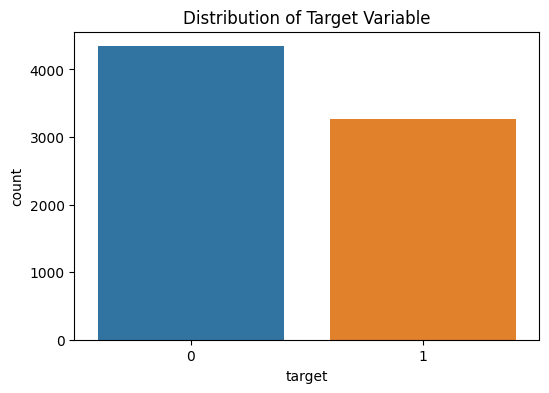

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

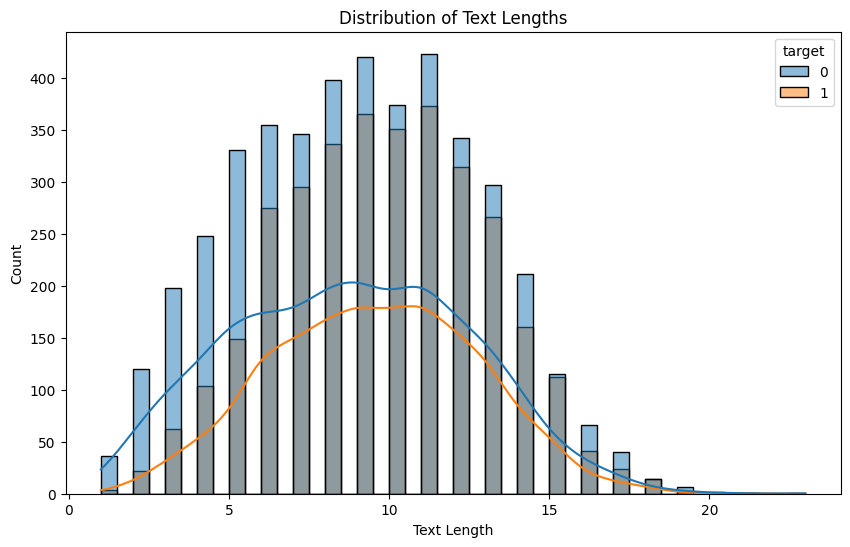

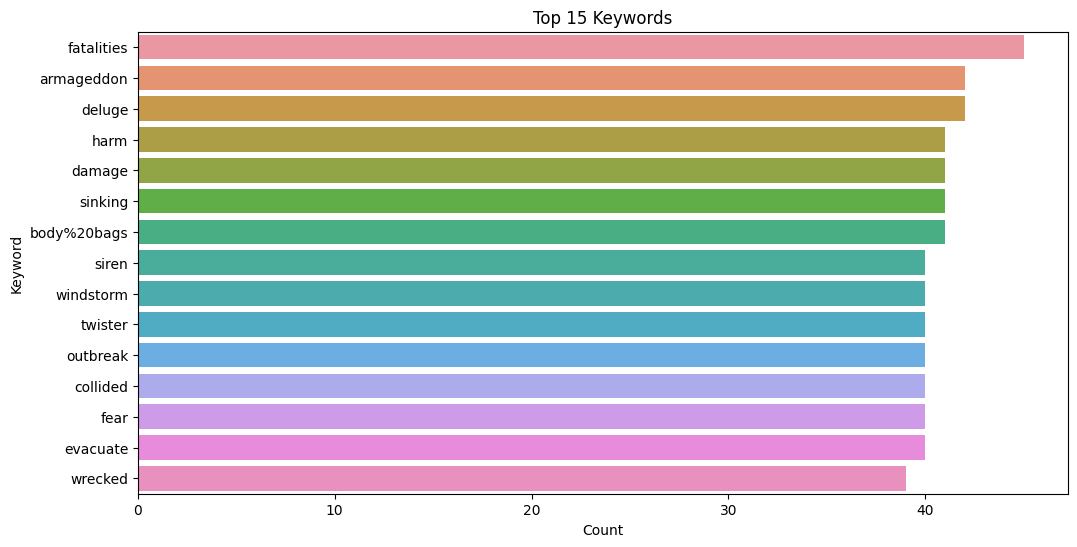


Cleaned Text:
0            deed reason earthquak may allah forgiv us
1                 forest fire near la rong sask canada
2    resid ask shelter place notifi offic evacu she...
3          peopl receiv wildfir evacu order california
4    got sent photo rubi alaska smoke wildfir pour ...
Name: clean_text, dtype: object


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
df_train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# Display the first few rows
print(df_train.head())

# Check for missing values
print(df_train.isnull().sum())

# Basic statistical summary of the numerical columns
print(df_train.describe())

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a single string
    text = ' '.join(tokens)
    return text

# Apply preprocessing to the text data
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

# Check the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='target')
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the distribution of text lengths
df_train['text_length'] = df_train['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='text_length', hue='target', kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

# Check the most common keywords
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, y='keyword', order = df_train['keyword'].value_counts().iloc[:15].index)
plt.title('Top 15 Keywords')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

# Combining all the text data
all_text = " ".join(df_train['clean_text'])


# Display the cleaned text
print("\nCleaned Text:")
print(df_train['clean_text'].head())

## Model Architecture
The text processing model that I chose to use was embedding in keras. I chose this layer for my model because embedding allows the computer to turn the different words in the text data to categorical variables that the computer is able to more easily interpret. The embedding layer works like a lookup table where the word is a key and the dense word vectors are the values.
[(embedding source)](http://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce)

I will also use a simpleRNN layer and a dense layer. These layers will help the computer to condense some of the data and be able to read through and process it faster. I will discuss the hyperparameter tuning that is being done below in the next markdown block.

In [32]:
# Define constants
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2

# Prepare data
X = df_train["clean_text"]
y = df_train["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)
X_test = df_test["clean_text"]

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
maxlen = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_val_pad = pad_sequences(X_val_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

# Hyperparameter testing
hyperparameters = {
    'epochs': [2, 4, 6, 8],
    'batch_size': [16, 32, 64, 128, 256]
}

results = []

for epoch in hyperparameters['epochs']:
    for batch_size in hyperparameters['batch_size']:
        print(f"Training for epoch={epoch}, batch_size={batch_size}")
        
        # Build the model
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 128),
            tf.keras.layers.SimpleRNN(64),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile the model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train_pad, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val_pad, y_val), verbose=0)

        # Evaluate the model
        loss, accuracy = model.evaluate(X_val_pad, y_val, verbose=0)
        results.append((epoch, batch_size, loss, accuracy))

# Find the best parameters
best_params = sorted(results, key=lambda x: x[2])[0]
print("Best Hyperparameters:")
print("Epochs: ", best_params[0])
print("Batch Size: ", best_params[1])
print("Validation Loss: ", best_params[2])
print("Validation Accuracy: {:.2f}%".format(best_params[3] * 100))



Training for epoch=2, batch_size=16


W0000 00:00:1713734614.609203      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713734617.457348      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=2, batch_size=32
Training for epoch=2, batch_size=64
Training for epoch=2, batch_size=128
Training for epoch=2, batch_size=256


W0000 00:00:1713734642.446384      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=4, batch_size=16


W0000 00:00:1713734645.719770      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713734648.348009      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=4, batch_size=32
Training for epoch=4, batch_size=64
Training for epoch=4, batch_size=128
Training for epoch=4, batch_size=256


W0000 00:00:1713734676.985084      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=6, batch_size=16


W0000 00:00:1713734680.492230      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713734683.045882      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=6, batch_size=32
Training for epoch=6, batch_size=64
Training for epoch=6, batch_size=128
Training for epoch=6, batch_size=256


W0000 00:00:1713734718.865959      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=8, batch_size=16


W0000 00:00:1713734722.723687      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713734725.347389      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training for epoch=8, batch_size=32
Training for epoch=8, batch_size=64
Training for epoch=8, batch_size=128
Training for epoch=8, batch_size=256


W0000 00:00:1713734766.001853      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Best Hyperparameters:
Epochs:  2
Batch Size:  256
Validation Loss:  0.5279146432876587
Validation Accuracy: 75.71%


## Hyperparamter Tuning
For my model, I chose to tune the parameters of epochs and batch size. Going into the tuning process, I expected the goal number of epochs to be one of the larger choices, but 2 continued to preform the best after multiple rounds of testing the model. The batch size was a little more variable as the testing went on, but the lower sizes tended to preform better overall. From the output of the previous code block, we can see that the best hyperparameters were epoch of 2 and batch size of 256. These parameters provided a 75% validation accuracy.

In the following code block and code output, I plotted the outputs from the various groups of epoch and batch size tests. We can see from the plots that the performance went down both accuracy-wise and validation loss-wise as I increased the number of epochs and the batch size.

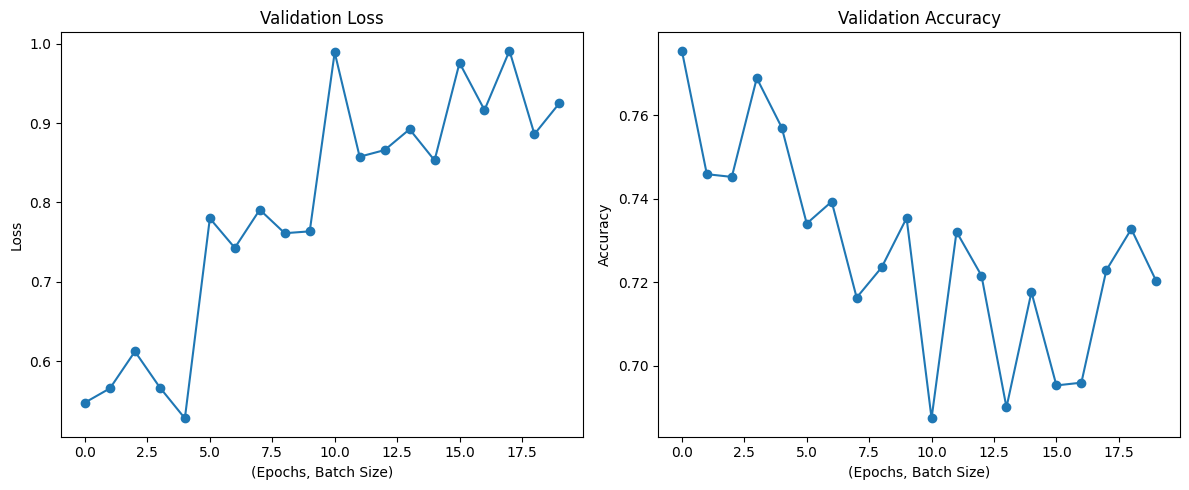

In [33]:
epochs = [res[0] for res in results]
batch_sizes = [res[1] for res in results]
val_losses = [res[2] for res in results]
val_accuracies = [res[3] for res in results]

plt.figure(figsize=(12, 5))

# Plotting Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(len(results)), val_losses, marker='o', linestyle='-')
# plt.xticks(range(len(results)), ['(2, 16)', '(2, 32)', '(2, 64)', '(4, 16)', '(4, 32)', '(4, 64)', '(6, 16)', '(6, 32)', '(6, 64)'], rotation=45)
plt.title('Validation Loss')
plt.xlabel('(Epochs, Batch Size)')
plt.ylabel('Loss')

# Plotting Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(results)), val_accuracies, marker='o', linestyle='-')
# plt.xticks(range(len(results)), ['(2, 16)', '(2, 32)', '(2, 64)', '(4, 16)', '(4, 32)', '(4, 64)', '(6, 16)', '(6, 32)', '(6, 64)'], rotation=45)
plt.title('Validation Accuracy')
plt.xlabel('(Epochs, Batch Size)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [34]:
# Retrain the model with the best parameters
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 128),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
best_params = [2,256]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train, epochs=best_params[0], batch_size=best_params[1], validation_data=(X_val_pad, y_val))

# Make predictions
predictions = (model.predict(X_test_pad) > 0.5).astype("int32")


Epoch 1/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6228 - loss: 0.6600 - val_accuracy: 0.7663 - val_loss: 0.5073
Epoch 2/2
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8577 - loss: 0.3636 - val_accuracy: 0.7531 - val_loss: 0.5260


W0000 00:00:1713734819.092260      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


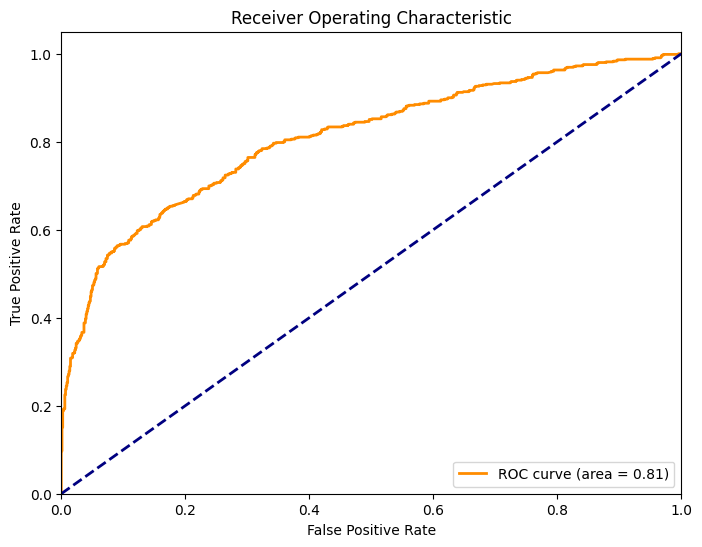

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


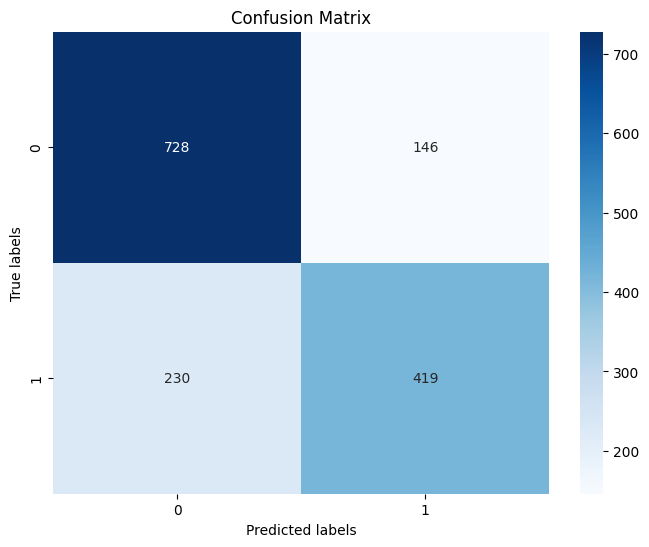

In [39]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
# AUC Curve
fpr, tpr, thresholds = roc_curve(y_val, model.predict(X_val_pad))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
y_pred = (model.predict(X_val_pad) > 0.5).astype("int32")
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Conclusion
In the end, my model preformed well, and I was able to get my submitted score to 75%. Based on the evaluation of my model, it seems that my false negative rate is pretty high. This means that the model classified the tweet as not referring to a disaster when the tweet actually was. This is surprising to me. I would have assumed that the algorithm would have taken more of the data literally and resulted in more false positives. This must mean that there is some strong predictor for a twet not being about a disaster that the model is picking up on and using that predictor to conclude the tweet was not about the disaster. Unfortunately, since we see a higher false negative rate, this strong predictor may be causing the model to be overfit to the training data.



## Code to submit my results

In [15]:
sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
sub['tar2'] = predictions
sub = sub.drop(columns=['target'])
sub = sub.rename(columns={'tar2':'target'})
sub

,id,target,tar2
0,0,0,0
1,2,0,0
2,3,0,1
3,9,0,0
4,11,0,1
...,...,...,...
3258,10861,0,1
3259,10865,0,1
3260,10868,0,1
3261,10874,0,1


In [17]:
sub.to_csv("submission.csv", index=False)